In [151]:
# Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import mplcursors
from datetime import datetime, timedelta
%matplotlib widget

In [152]:
# Function to calculate the start date (10 years ago from the current date)
def get_start_date():
    today = datetime.today()
    ten_years_ago = today - timedelta(days=365 * 10)
    return ten_years_ago.strftime("%Y-%m-%d")

In [155]:
# Retrive data from FRED API and test IDs
class FREDDataFetcher:
    def __init__(self, api_key):
        self.api_key = api_key

    def fetch_data(self, series_ids):
        data = {}
        start_date = get_start_date()
        end_date = datetime.today().strftime("%Y-%m-%d")
        for series_id in series_ids:
            api_url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}"
            params = {
                "series_id": series_id,
                "api_key": self.api_key,
                "file_type": "json",
                "observation_start": start_date,
                "observation_end": end_date,
            }
            response = requests.get(api_url, params=params)
            
            if response.status_code == 200:
                data[series_id] = response.json()["observations"]
            else:
                print(f"Failed to fetch data for series ID: {series_id}")
        
        return data

# Enter your API key
api_key = "Your API key"
data_fetcher = FREDDataFetcher(api_key)

In [156]:
# Define the series IDs 
series_ids = [
    "MEDLISPRIPERSQUFEETX", # Housing Inventory: Median Listing Price per Square Feet in Texas   
    "MEDLISPRITX",          # Housing Inventory: Median Listing Price in Texas                   
    "TXSTHPI",              # All-Transactions House Price Index for Texas                       
                                         
]

# Fetch data for the specified series IDs
data = data_fetcher.fetch_data(series_ids)

In [ ]:
# Create a dictionary to store DataFrames for each series
dataframes = {}

for series_id, observations in data.items():
    df = pd.DataFrame(observations)
    if not df.empty:
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
        dataframes[series_id] = df
    else:
        print(f"No data available for series ID: {series_id}")

for series_id, df in dataframes.items():
    print(f"DataFrame for Series ID: {series_id}")
    print(df)
    print()  # Add an empty line for separation

DataFrame for Series ID: MEDLISPRIPERSQUFEETX
           realtime_start realtime_end  value
date                                         
2016-07-01     2023-10-23   2023-10-23  117.0
2016-08-01     2023-10-23   2023-10-23  116.0
2016-09-01     2023-10-23   2023-10-23  116.0
2016-10-01     2023-10-23   2023-10-23  116.0
2016-11-01     2023-10-23   2023-10-23  116.0
...                   ...          ...    ...
2023-05-01     2023-10-23   2023-10-23  190.0
2023-06-01     2023-10-23   2023-10-23  191.0
2023-07-01     2023-10-23   2023-10-23  190.0
2023-08-01     2023-10-23   2023-10-23  189.0
2023-09-01     2023-10-23   2023-10-23  188.0

[87 rows x 3 columns]

DataFrame for Series ID: MEDLISPRITX
           realtime_start realtime_end     value
date                                            
2016-07-01     2023-10-23   2023-10-23  279500.0
2016-08-01     2023-10-23   2023-10-23  274995.0
2016-09-01     2023-10-23   2023-10-23  274700.0
2016-10-01     2023-10-23   2023-10-23  270000.0
2

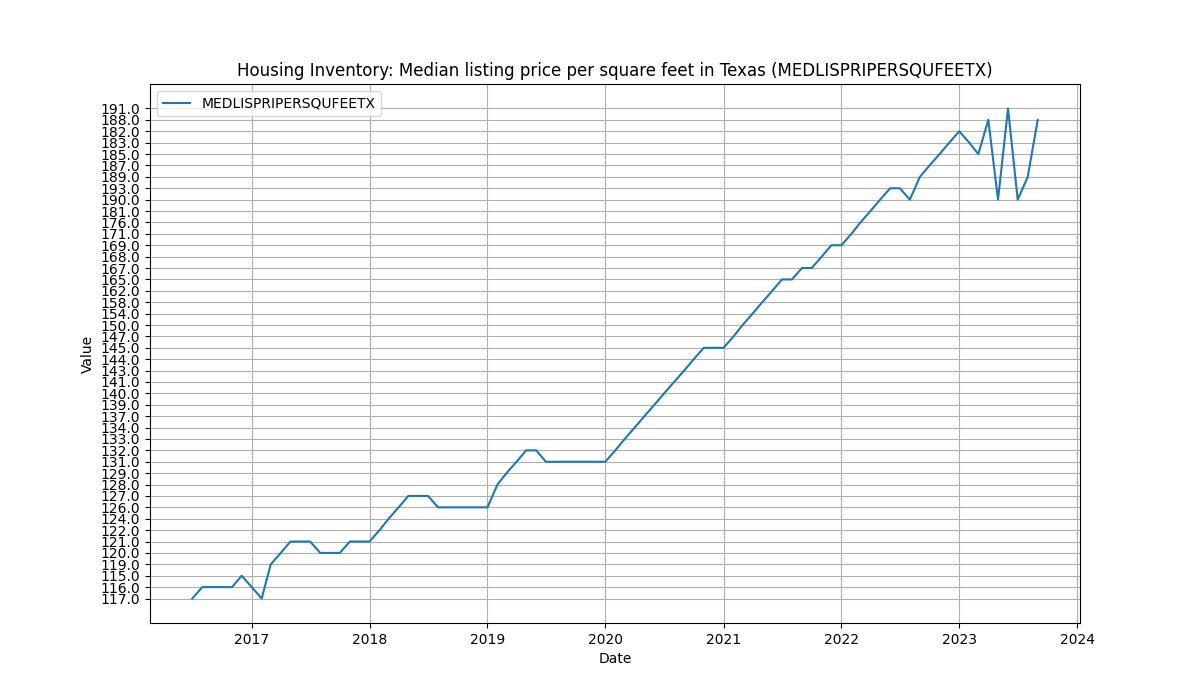

In [157]:
# Create graph for housing invetory median listing price
series_id_to_plot = "MEDLISPRIPERSQUFEETX"

# Get the DataFrame for the specified series
df_to_plot = dataframes.get(series_id_to_plot)

if df_to_plot is not None:
    # Create a line chart
    plt.figure(figsize=(12, 7))
    plt.title(f"Housing Inventory: Median listing price per square feet in Texas ({series_id_to_plot})")
    plt.xlabel("Date")
    plt.ylabel("Value")
    line, = plt.plot(df_to_plot.index, df_to_plot["value"], label=series_id_to_plot)
    plt.legend()
    plt.grid(True)

    # Add interactive hover labels using mplcursors
    cursor = mplcursors.cursor(line, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(
        f"Date: {pd.to_datetime(df_to_plot.index[int(sel.index)]).strftime('%Y-%m-%d')}\n"
        f"{series_id_to_plot}: {df_to_plot.iloc[int(sel.index), -1]}$"))


    # Display graph 
    plt.show()
else:
    print(f"No data available for series ID: {series_id_to_plot}")

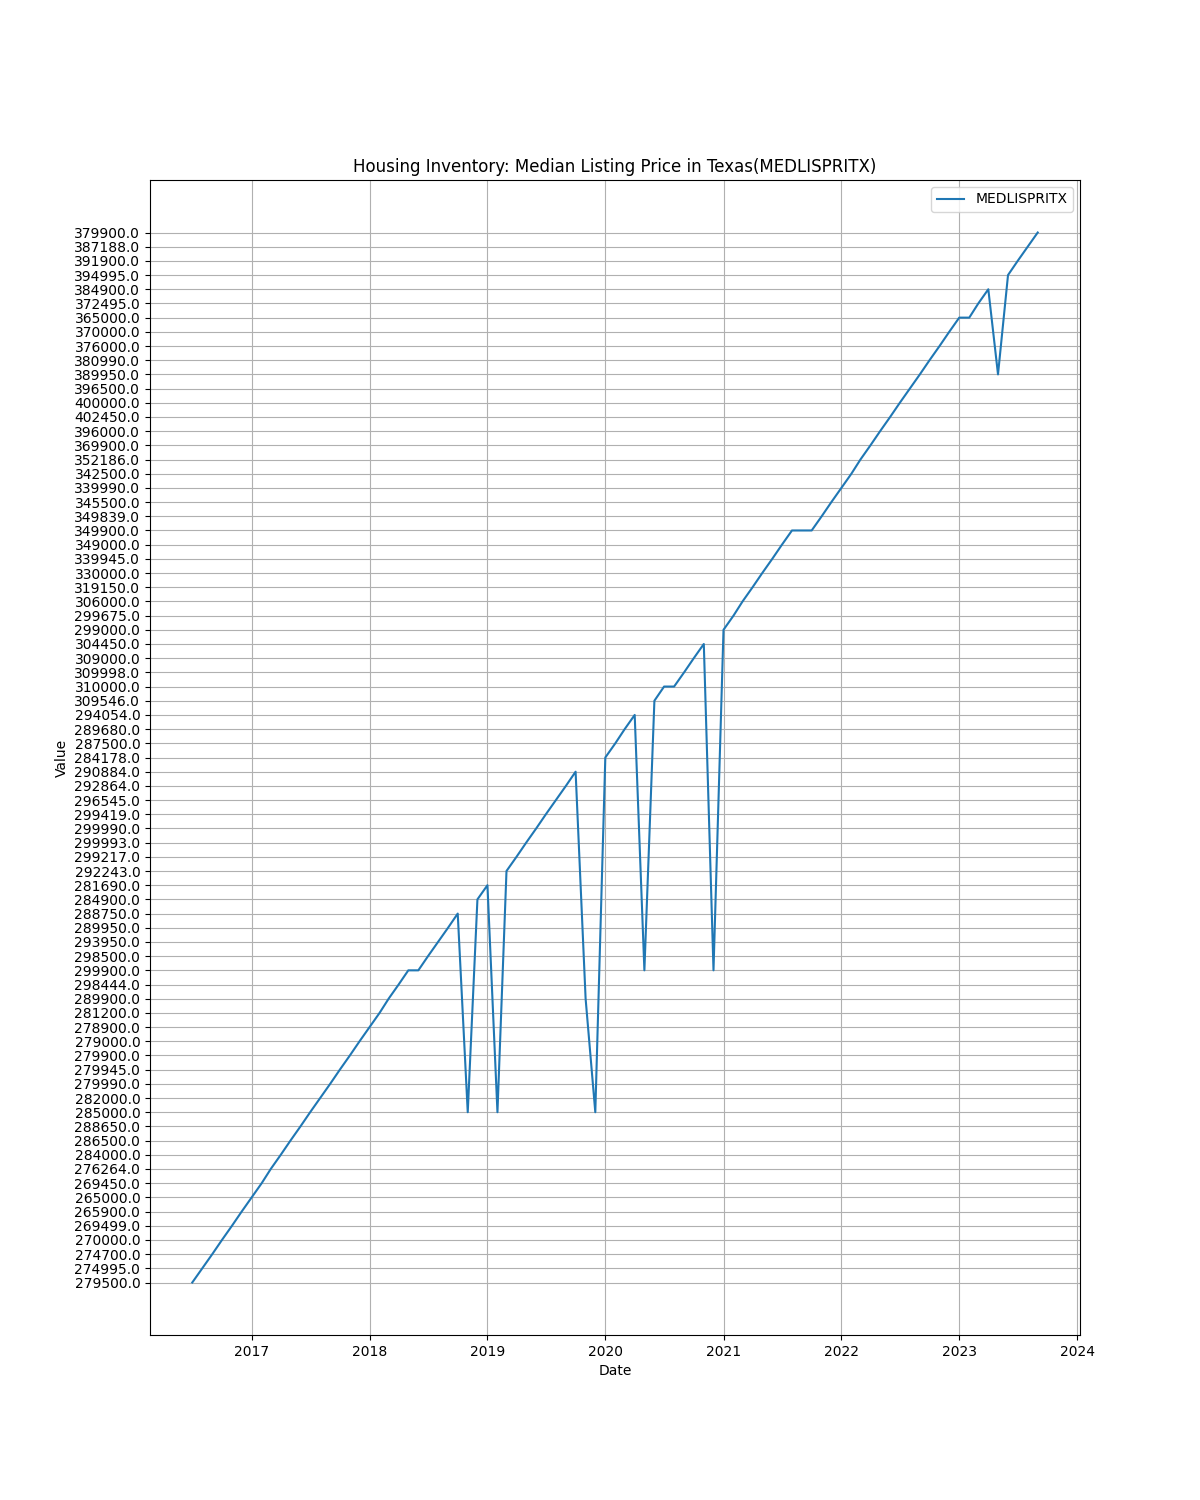

In [ ]:
# Create graph for housing invetory median listing price
series_id_to_plot = "MEDLISPRITX"

# Get the DataFrame for the specified series
df_to_plot = dataframes.get(series_id_to_plot)

if df_to_plot is not None:
    # Create a line chart
    plt.figure(figsize=(12, 15))
    plt.title(f"Housing Inventory: Median Listing Price in Texas({series_id_to_plot})")
    plt.xlabel("Date")
    plt.ylabel("Value")
    line, = plt.plot(df_to_plot.index, df_to_plot["value"], label=series_id_to_plot)
    plt.legend()
    plt.grid(True)

    # Add interactive hover labels using mplcursors
    cursor = mplcursors.cursor(line, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(
        f"Date: {pd.to_datetime(df_to_plot.index[int(sel.index)]).strftime('%Y-%m-%d')}\n"
        f"{series_id_to_plot}: {df_to_plot.iloc[int(sel.index), -1]}$"))


    # Display graph 
    plt.show()
else:
    print(f"No data available for series ID: {series_id_to_plot}")

Slope: 1529.5731617582953
Intercept: 93664.38131854724
R-squared: 0.9681957793783994


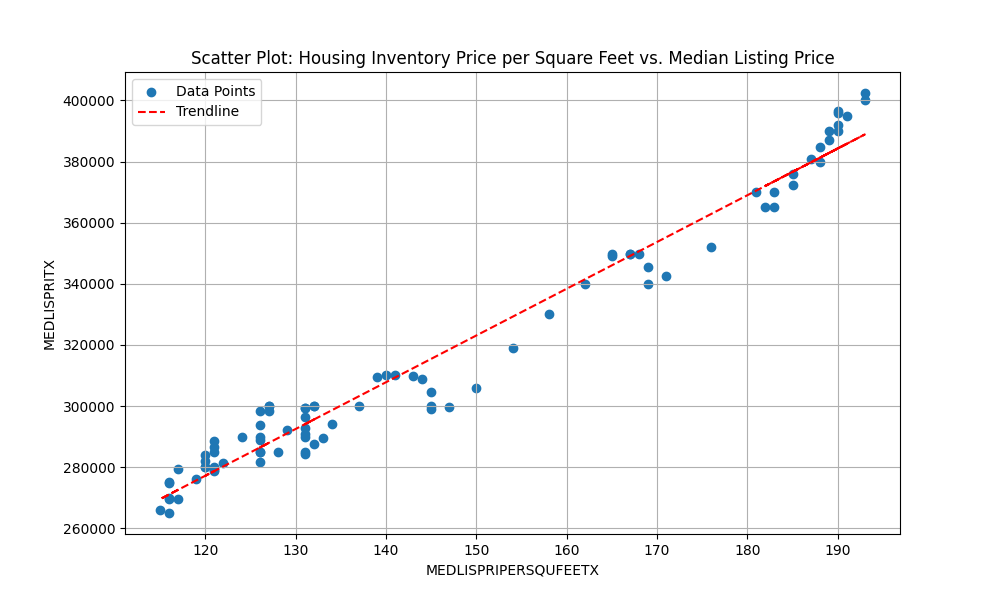

In [ ]:
# Get the DataFrames for the two series
df_x = dataframes.get("MEDLISPRIPERSQUFEETX")
df_y = dataframes.get("MEDLISPRITX")

# Convert values to numeric (float) data type
x_values = pd.to_numeric(df_x["value"], errors="coerce")
y_values = pd.to_numeric(df_y["value"], errors="coerce")

# Check for missing or invalid values
x_values = x_values.dropna()
y_values = y_values.dropna()

# Ensure that both x_values and y_values have the same indices
common_indices = x_values.index.intersection(y_values.index)
x_values = x_values[common_indices]
y_values = y_values[common_indices]

# Perform linear regression analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

# Print the results
print(f"Slope: {slope}") # Indicates the rate of change
print(f"Intercept: {intercept}") 
print(f"R-squared: {r_value**2}") # Proportion of variance(the closer to 1 the better)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot: Housing Inventory Price per Square Feet vs. Median Listing Price")
plt.xlabel("MEDLISPRIPERSQUFEETX")
plt.ylabel("MEDLISPRITX")

# Plot the data points
scatter = plt.scatter(x_values, y_values, label="Data Points")

# Add a trendline (linear regression analysis)
z = np.polyfit(x_values, y_values, 1)
p = np.poly1d(z)
plt.plot(x_values, p(x_values), "r--", label="Trendline")
plt.legend()
plt.grid(True)

# Add interactive hover labels using mplcursors
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"MEDLISPRIPERSQUFEETX: {x_values.iloc[int(sel.index)]}\n"
    f"MEDLISPRITX: {y_values.iloc[int(sel.index)]}"))

# Display the graph
plt.show()

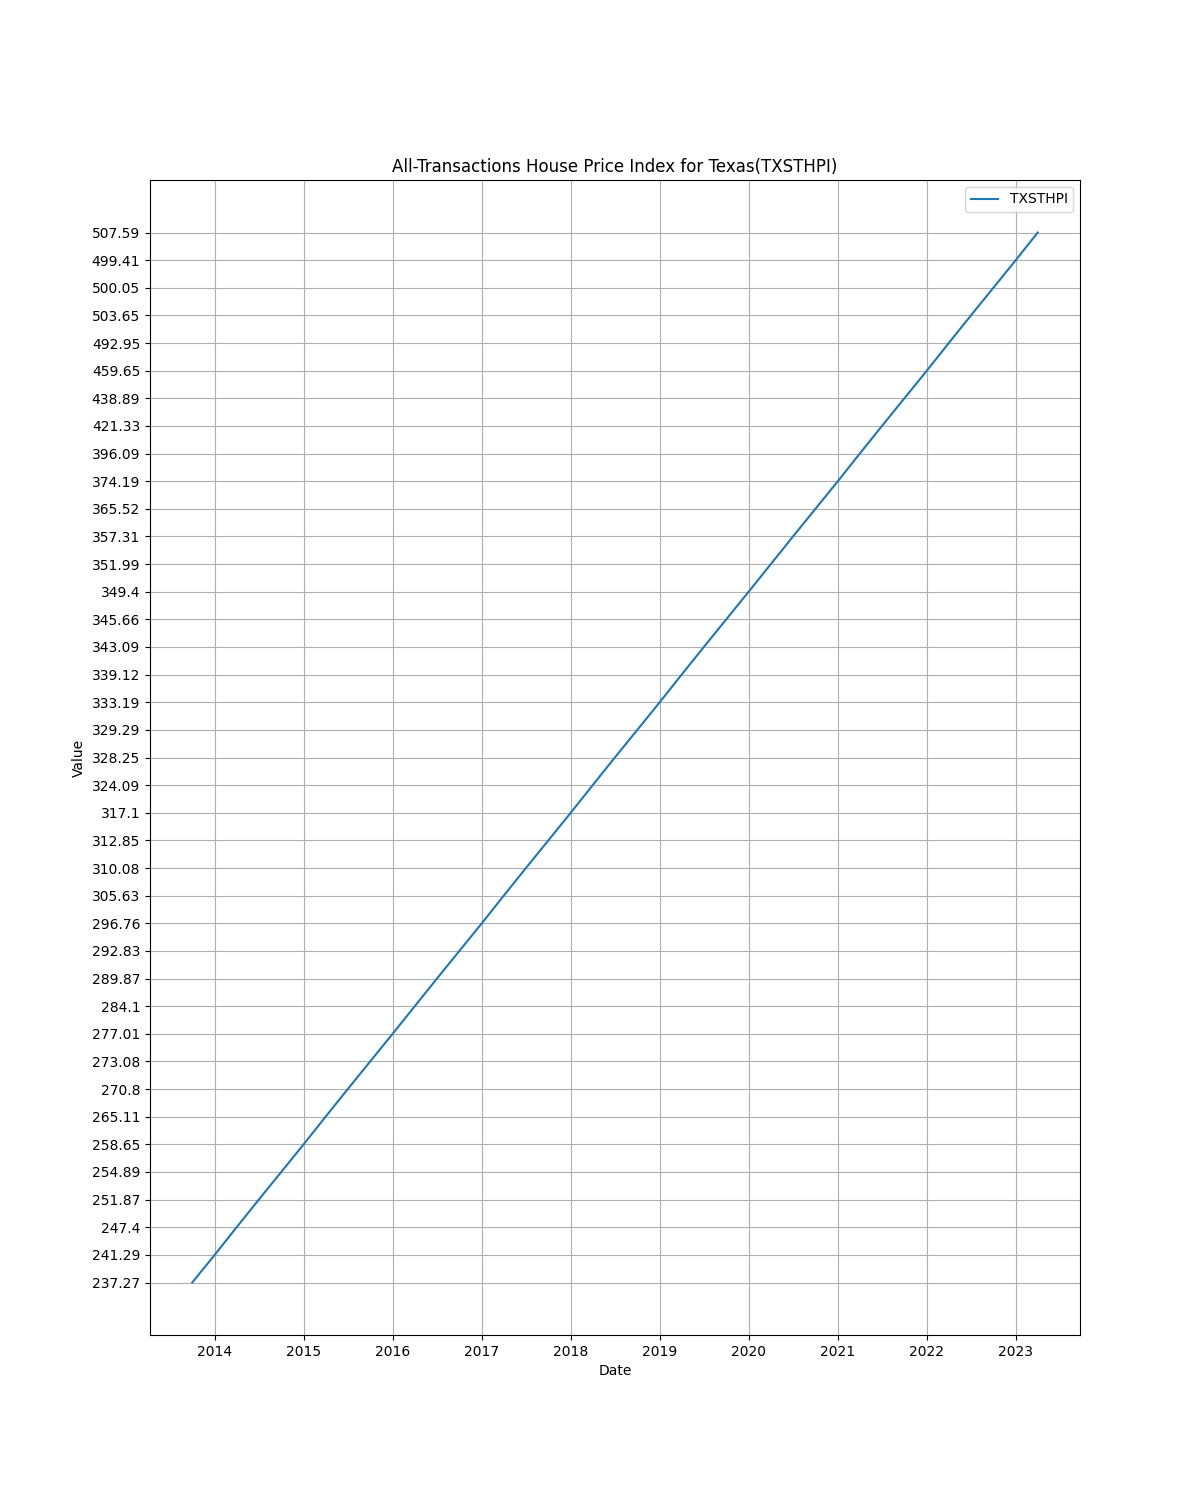

In [ ]:
# Create graph for All-Transactions House Price Index for Texas 
series_id_to_plot = "TXSTHPI"

# Get the DataFrame for the specified series
df_to_plot = dataframes.get(series_id_to_plot)

if df_to_plot is not None:
    # Create a line chart
    plt.figure(figsize=(12, 15))
    plt.title(f"All-Transactions House Price Index for Texas({series_id_to_plot})")
    plt.xlabel("Date")
    plt.ylabel("Value")
    line, = plt.plot(df_to_plot.index, df_to_plot["value"], label=series_id_to_plot)
    plt.legend()
    plt.grid(True)

    # Add interactive hover labels using mplcursors
    cursor = mplcursors.cursor(line, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(
        f"Date: {pd.to_datetime(df_to_plot.index[int(sel.index)]).strftime('%Y-%m-%d')}\n"
        f"{series_id_to_plot}: {df_to_plot.iloc[int(sel.index), -1]}$"))


    # Display graph 
    plt.show()
else:
    print(f"No data available for series ID: {series_id_to_plot}")

Slope: 0.0018317110039576332
Intercept: -198.19777824169114
R-squared: 0.943715444329137


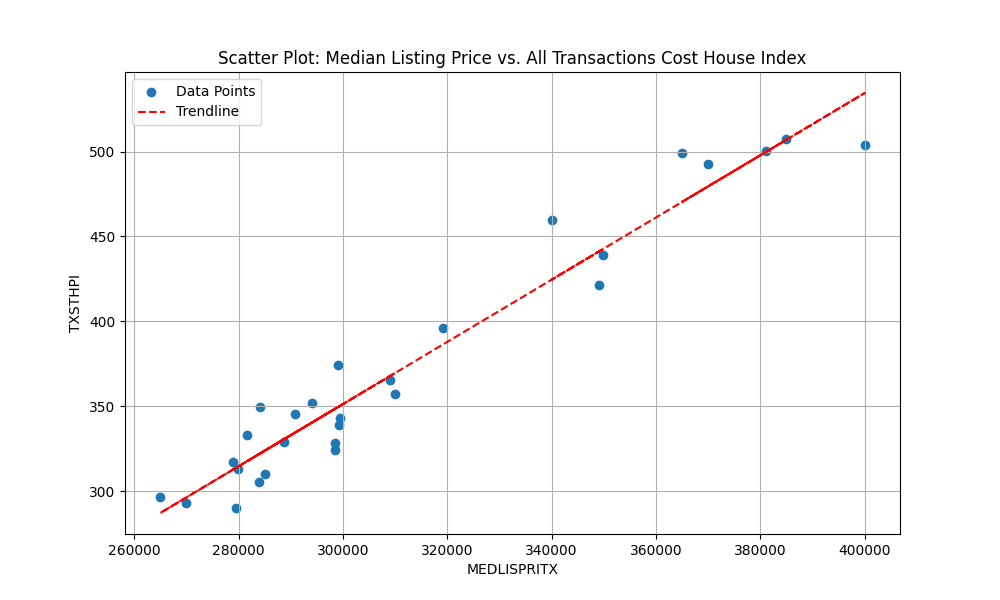

In [ ]:
# Get the DataFrames for the two series
df_x = dataframes.get("MEDLISPRITX")
df_y = dataframes.get("TXSTHPI")

# Convert values to numeric (float) data type
x_values = pd.to_numeric(df_x["value"], errors="coerce")
y_values = pd.to_numeric(df_y["value"], errors="coerce")

# Check for missing or invalid values
x_values = x_values.dropna()
y_values = y_values.dropna()

# Ensure that both x_values and y_values have the same indices
common_indices = x_values.index.intersection(y_values.index)
x_values = x_values[common_indices]
y_values = y_values[common_indices]

# Perform linear regression analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

# Print the results
print(f"Slope: {slope}")  # Indicates the rate of change
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")  # Proportion of variance (the closer to 1, the better)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot: Median Listing Price vs. All Transactions Cost House Index")
plt.xlabel("MEDLISPRITX")
plt.ylabel("TXSTHPI")

# Plot the data points
scatter = plt.scatter(x_values, y_values, label="Data Points")

# Add trendline (linear regression analysis)
z = np.polyfit(x_values, y_values, 1)
p = np.poly1d(z)
plt.plot(x_values, p(x_values), "r--", label="Trendline")
plt.legend()
plt.grid(True)

# Add interactive hover labels using mplcursors
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"MEDLISPRITX: {x_values.iloc[int(sel.index)]}\n"
    f"TXSTHPI: {y_values.iloc[int(sel.index)]}"))

# Display the graph
plt.show()

